In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [6]:
listings = pd.read_csv('../data/listings.csv',parse_dates = ['host_since'])
listings.head(5)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,6422,https://www.airbnb.com/rooms/6422,20241221051945,2024-12-21,city scrape,Nashville Charm,30 day plus rental - book for one month and th...,Historic East Nashville is home to many new an...,https://a0.muscache.com/pictures/miso/Hosting-...,12172,...,4.96,4.92,4.98,NaN,f,1,0,1,0,3.52
1,39870,https://www.airbnb.com/rooms/39870,20241221051945,2024-12-21,city scrape,Close to Vanderbilt 2,"Since I am older, I need for guests to be vacc...","The house is in a safe, quiet, ""college"" neig...",https://a0.muscache.com/pictures/miso/Hosting-...,171184,...,4.97,4.93,4.92,NaN,f,1,0,1,0,5.19
2,59576,https://www.airbnb.com/rooms/59576,20241221051945,2024-12-21,city scrape,Large Main Suite near Lake *ladies only NS plz,non-smokers only please<br /><br />furnished r...,We live on a cul-de-sac in a small community o...,https://a0.muscache.com/pictures/4e4e34db-3155...,812128,...,5.00,5.00,5.00,NaN,f,7,2,5,0,0.10
3,72906,https://www.airbnb.com/rooms/72906,20241221051945,2024-12-21,city scrape,Vandy/Belmont/10 mins to Broadway - Sunny 800 ...,Entire private top floor of my home with share...,Historic Belmont-Hillsboro neighborhood. Walk-...,https://a0.muscache.com/pictures/1777db4f-d0a6...,176117,...,4.99,4.97,4.90,NaN,f,1,1,0,0,4.54
4,258817,https://www.airbnb.com/rooms/258817,20241221051945,2024-12-21,city scrape,"ButterflyRoom-queen room, private bath",Morningstar House! Extended stay - 3+ months- ...,"I'm very near the Percy Priest Lake, natural ...",https://a0.muscache.com/pictures/eef19bc4-2743...,22296,...,4.91,4.74,4.73,NaN,f,8,0,7,1,0.61


In [8]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9406 entries, 0 to 9405
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   id                                            9406 non-null   int64         
 1   listing_url                                   9406 non-null   object        
 2   scrape_id                                     9406 non-null   int64         
 3   last_scraped                                  9406 non-null   object        
 4   source                                        9406 non-null   object        
 5   name                                          9406 non-null   object        
 6   description                                   9188 non-null   object        
 7   neighborhood_overview                         6201 non-null   object        
 8   picture_url                                   9406 non-null   object

In [85]:
p = listings['price']
p.max()

0

In [87]:
listings['price'] = listings['price'].astype(str)
listings['price'] = listings['price'].replace(r'[\$,]', '', regex=True)
listings['price']

0       0
1       0
2       0
3       0
4       0
       ..
9401    0
9402    0
9403    0
9404    0
9405    0
Name: price, Length: 9406, dtype: object

In [89]:
listings['price'] = pd.to_numeric(listings['price'], errors='coerce').fillna(0)
listings['price']

0       0
1       0
2       0
3       0
4       0
       ..
9401    0
9402    0
9403    0
9404    0
9405    0
Name: price, Length: 9406, dtype: int64

In [91]:
listings['price'] = pd.to_numeric(listings['price'], errors='coerce').fillna(0)
listings['price'] = listings['price'].astype(int)
listings['price']

0       0
1       0
2       0
3       0
4       0
       ..
9401    0
9402    0
9403    0
9404    0
9405    0
Name: price, Length: 9406, dtype: int32

In [93]:
listings['price'].max()

0

In [95]:
avg_price = listings['price'].mean()
avg_price

0.0

In [97]:
listings.head(1)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,year
0,6422,https://www.airbnb.com/rooms/6422,20241221051945,2024-12-21,city scrape,Nashville Charm,30 day plus rental - book for one month and th...,Historic East Nashville is home to many new an...,https://a0.muscache.com/pictures/miso/Hosting-...,12172,...,4.92,4.98,NaN,f,1,0,1,0,3.52,2009


In [99]:
# listings.to_csv('outpur_listings.csv',index = False)

In [101]:
below_100 = len(listings[listings.price < 100]) # / len(listings.price))*100
below_100

9406

In [103]:
# since listed in airbnb
listings['host_since']

0      2009-04-03
1      2010-07-18
2      2011-07-12
3      2010-07-21
4      2009-06-19
          ...    
9401   2024-04-23
9402   2016-06-25
9403   2016-07-22
9404   2016-07-22
9405   2024-12-20
Name: host_since, Length: 9406, dtype: datetime64[ns]

In [105]:
listings['year'] = listings['host_since'].astype(str).str.extract(r'(\d{4})', expand=False)
listings.head(3)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,year
0,6422,https://www.airbnb.com/rooms/6422,20241221051945,2024-12-21,city scrape,Nashville Charm,30 day plus rental - book for one month and th...,Historic East Nashville is home to many new an...,https://a0.muscache.com/pictures/miso/Hosting-...,12172,...,4.92,4.98,NaN,f,1,0,1,0,3.52,2009
1,39870,https://www.airbnb.com/rooms/39870,20241221051945,2024-12-21,city scrape,Close to Vanderbilt 2,"Since I am older, I need for guests to be vacc...","The house is in a safe, quiet, ""college"" neig...",https://a0.muscache.com/pictures/miso/Hosting-...,171184,...,4.93,4.92,NaN,f,1,0,1,0,5.19,2010
2,59576,https://www.airbnb.com/rooms/59576,20241221051945,2024-12-21,city scrape,Large Main Suite near Lake *ladies only NS plz,non-smokers only please<br /><br />furnished r...,We live on a cul-de-sac in a small community o...,https://a0.muscache.com/pictures/4e4e34db-3155...,812128,...,5.00,5.00,NaN,f,7,2,5,0,0.10,2011


In [107]:
listings_since_by_year = listings.groupby('year')['host_id'].nunique().reset_index(name='total count')
listings_since_by_year

,year,total count
0,2009,5
1,2010,17
2,2011,47
3,2012,104
4,2013,179
5,2014,359
6,2015,509
7,2016,615
8,2017,360
9,2018,305


Text(0.5, 1.0, 'Number of Nashville Aibnb Hosts by Year')

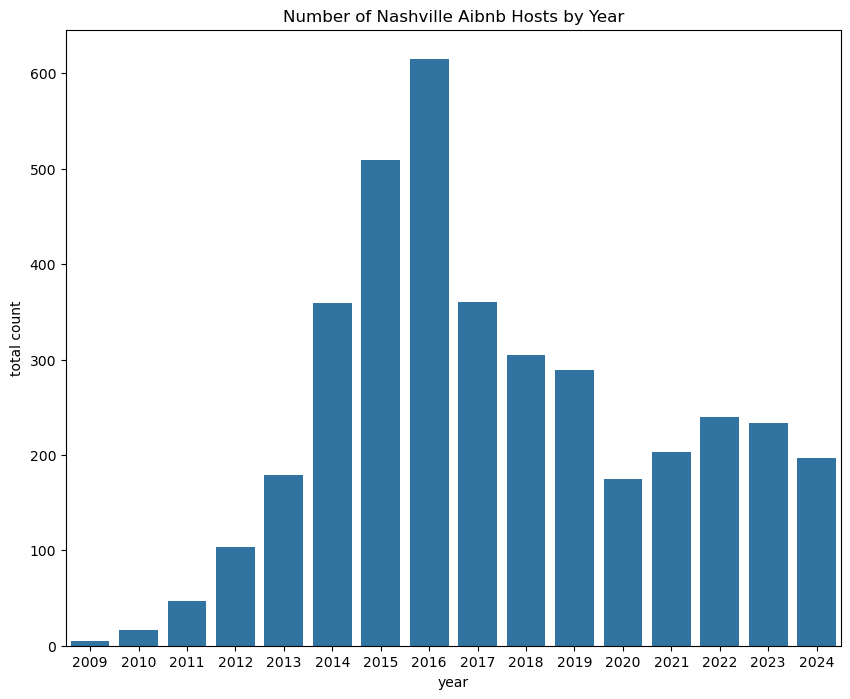

In [109]:
plt.figure(figsize=(10,8))
sns.barplot(x='year',y='total count',data=listings_since_by_year)
plt.title("Number of Nashville Aibnb Hosts by Year")

In [131]:
listings_since_by_year['percentage_change']= listings_since_by_year['total count'].pct_change()*100
#
listings_since_by_year

,year,total count,percentage_change
0,2009,5,NaN
1,2010,17,240.000000
2,2011,47,176.470588
3,2012,104,121.276596
4,2013,179,72.115385
5,2014,359,100.558659
6,2015,509,41.782730
7,2016,615,20.825147
8,2017,360,-41.463415
9,2018,305,-15.277778


Text(0.5, 1.0, 'Percentage Change in Number of Nashville Airbnb Rental Listings')

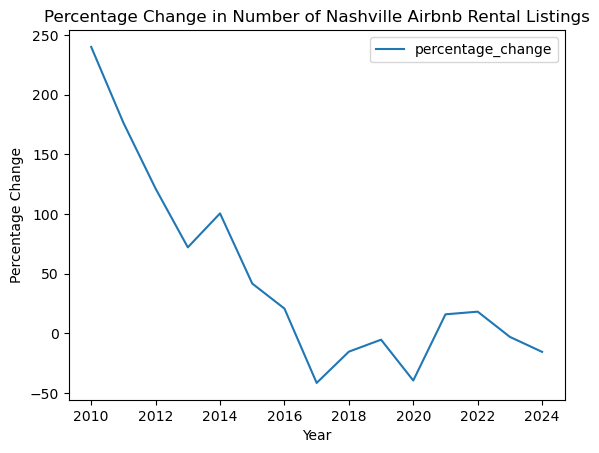

In [137]:
listings_since_by_year.plot(x='year', y='percentage_change', kind='line')
plt.xlabel('Year')
plt.ylabel('Percentage Change')
plt.title("Percentage Change in Number of Nashville Airbnb Rental Listings")

In [111]:
# Top 10 hosts names 
top_host_listings = listings.groupby('host_name')[['calculated_host_listings_count']].count().sort_values('calculated_host_listings_count',ascending = False)

In [113]:
top_host_listings.head(10)


,calculated_host_listings_count
host_name,
Host Extraordinaires,202
AvantStay Nashville,173
Vacasa Tennessee,157
GoodNight,153
Bowen,147
StayLocal,134
David,131
UrbanNashville,118
Amy,108
